In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
column_names = ["Longitudinal_Position", "Prismatic_Coefficient", "Length_Displacement_Ratio", "Beam_Draught_Ratio", "Length_Beam_Ratio", "Froude_Number", "Residuary_Resistance"]
data = pd.read_csv("./Dataset/yacht_hydrodynamics.data",sep=r'\s+',header=None, names=column_names)
# data.drop(columns = [data.columns[16], data.columns[17], data.columns[18]], axis=1, inplace=True)
data.dropna(inplace = True)
data.reset_index(inplace = True)
data
# data = (data - data.mean()) / data.std()

,index,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement_Ratio,Beam_Draught_Ratio,Length_Beam_Ratio,Froude_Number,Residuary_Resistance
0,0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...,...
303,303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


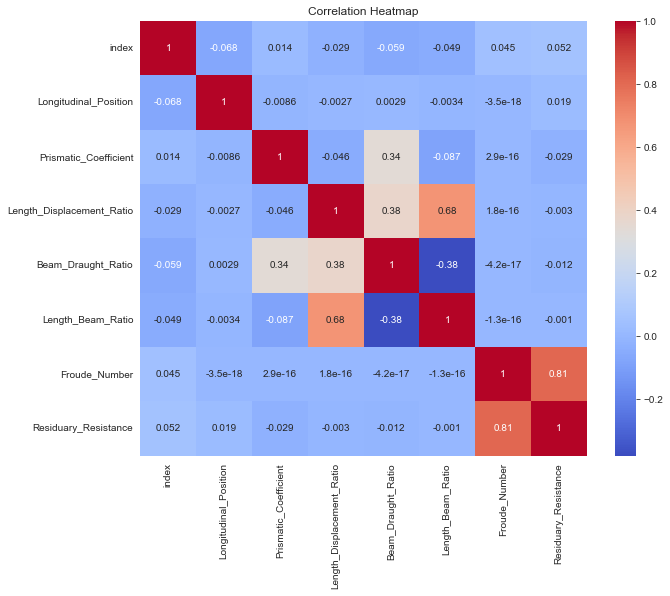

In [5]:
plt.figure(figsize = (10, 8))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
import statsmodels.api as sm

input_features = ['Froude_Number']
target_feature = 'Residuary_Resistance'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

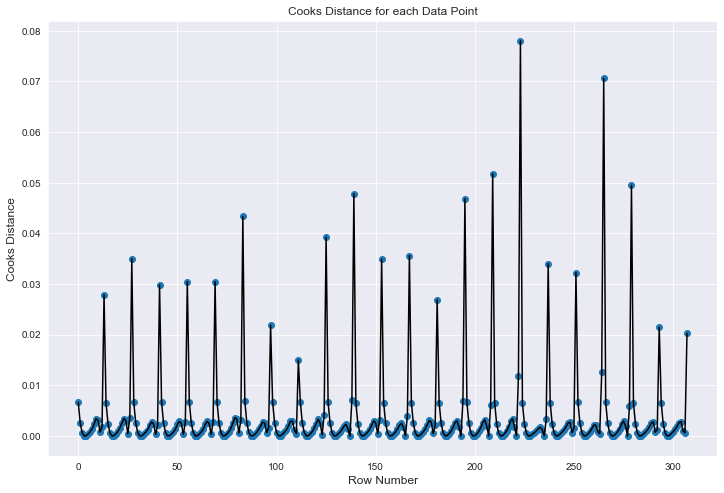

In [8]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [9]:
data1 = data[['Froude_Number', 'Residuary_Resistance']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,Froude_Number,Residuary_Resistance
13,0.45,49.49
27,0.45,51.80
41,0.45,50.14
55,0.45,50.36
69,0.45,50.36
83,0.45,54.23
97,0.45,47.29
125,0.45,53.07
139,0.45,55.44
153,0.45,51.77


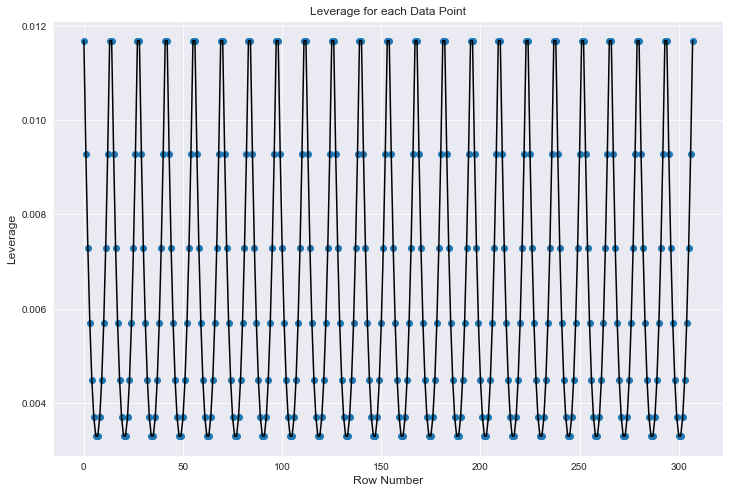

In [10]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [15]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,Froude_Number,Residuary_Resistance


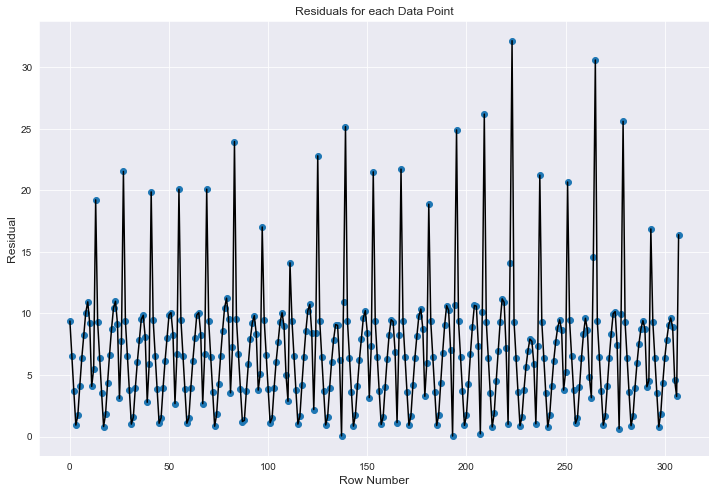

In [16]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [17]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,Froude_Number,Residuary_Resistance
223,0.45,62.42
265,0.45,60.85
